<a href="https://colab.research.google.com/github/Iammudassir10/Covid-19/blob/main/Covid19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [ ]:
import pandas as pd
file_path = 'covid_19.xlsx'
confirmed = pd.read_excel(file_path, sheet_name='covid_19_confirmed_v1')
deaths = pd.read_excel(file_path, sheet_name='covid_19_deaths_v1')
recovered = pd.read_excel(file_path, sheet_name='covid_19_recovered_v1')

In [ ]:
print("Missing values in confirmed")
print(confirmed.isnull().sum())
print("\nMissing values in deaths")
print(deaths.isnull().sum())
print("\nMissing values in recovered")
print(recovered.isnull().sum())

Missing values in confirmed
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

Missing values in deaths
Province/State    190
Country/Region      0
Lat                 2
Long                2
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64

Missing values in recovered
Province/State    191
Country/Region      0
Lat                 1
Long                1
1/22/20             0
                 ... 
5/25/21             0
5/26/21             0
5/27/21             0
5/28/21             0
5/29/21             0
Length: 498, dtype: int64


In [ ]:
confirmed.info()
deaths.info()
recovered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(2), int64(494), object(2)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 276 entries, 0 to 275
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(3), int64(493), object(2)
memory usage: 1.0+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261 entries, 0 to 260
Columns: 498 entries, Province/State to 5/29/21
dtypes: float64(3), int64(493), object(2)
memory usage: 1015.6+ KB


In [ ]:
confirmed['Province/State']=confirmed['Province/State'].fillna('All Province')
deaths['Province/State']=deaths['Province/State'].fillna('All Province')
recovered['Province/State']=recovered['Province/State'].fillna('All Province')

/tmp/ipython-input-2124640808.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  china_province_data.index = pd.to_datetime(china_province_data.index) # Convert index to datetime objects


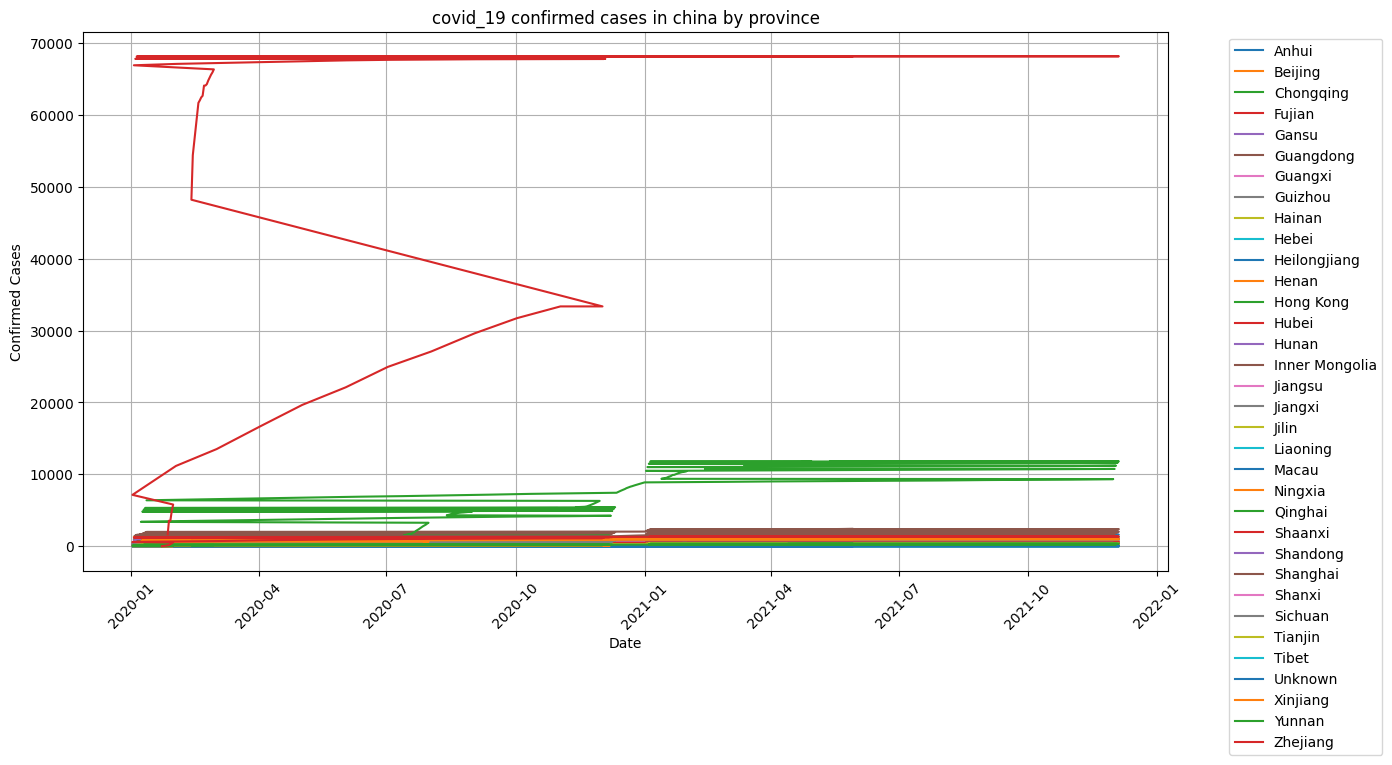

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

china_data = confirmed[confirmed['Country/Region'] == 'China']
china_province_data = china_data.set_index('Province/State').iloc[:,4:].T
china_province_data.index = pd.to_datetime(china_province_data.index) # Convert index to datetime objects

plt.figure(figsize=(14,7))
for province in china_province_data.columns:
  plt.plot(china_province_data.index, china_province_data[province], label = province)
  plt.xlabel('Date')
  plt.ylabel('Confirmed Cases')
  plt.xticks(rotation=45)
  plt.title('covid_19 confirmed cases in china by province')
plt.legend(bbox_to_anchor=(1.05, 1),loc='upper left')
plt.grid(True)
plt.show()

In [ ]:
meta_cols = ["Province/State","Country/Region","Lat","Long"]

date_cols = [col for col in confirmed.columns if col not in meta_cols]

In [ ]:
confirmed_by_country = (confirmed.drop(columns = ["Lat","Long"],errors = "ignore")
.groupby("Country/Region", as_index=True)[date_cols]
.sum()
)

In [ ]:
daily_by_country = confirmed_by_country.diff(axis=1)
daily_by_country.iloc[:,0]=0
daily_by_country = daily_by_country.clip(lower=0)

In [ ]:
daily7_by_country = daily_by_country.rolling(window=7,axis=1,min_periods=1).mean()


/tmp/ipython-input-2103225070.py:1: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  daily7_by_country = daily_by_country.rolling(window=7,axis=1,min_periods=1).mean()


In [ ]:
focus_countries = ["Germany", "Italy", "France", "Canada","Australia"]
peak_report={}

for country in focus_countries:
  series = daily_by_country.loc[country]
  peak_value = int(series.max())
  peak_date = series.idxmax()
  peak_report[country]= {"peak_daily_new": peak_value, "peak_date": peak_date}
print("Peak no of daily new cases")

for k,v in peak_report.items():
  print(f" - {k}: {v['peak_daily_new']} on {v['peak_date']}")

Peak no of daily new cases
 - Germany: 49044 on 12/30/20
 - Italy: 40902 on 11/13/20
 - France: 117900 on 2021-11-04 00:00:00
 - Canada: 16141 on 2021-03-01 00:00:00
 - Australia: 716 on 7/29/20


/tmp/ipython-input-3872493737.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(series.index),series.values,label=country)
/tmp/ipython-input-3872493737.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(series.index),series.values,label=country)
/tmp/ipython-input-3872493737.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(series.index),series.values,label=country)
/tmp/ipython-input-3872493737.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to

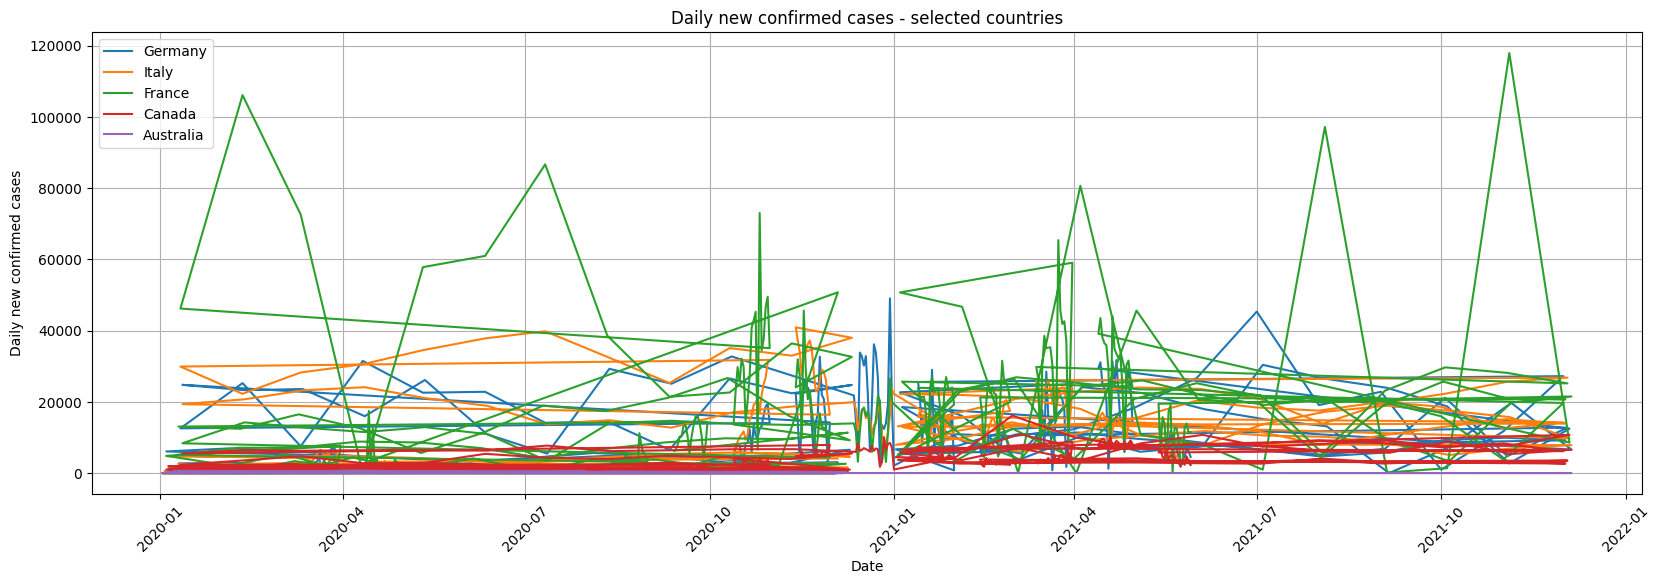

/tmp/ipython-input-3872493737.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(series.index),series.values,label=country)
/tmp/ipython-input-3872493737.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(series.index),series.values,label=country)
/tmp/ipython-input-3872493737.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  plt.plot(pd.to_datetime(series.index),series.values,label=country)
/tmp/ipython-input-3872493737.py:17: UserWarning: Could not infer format, so each element will be parsed individually, falling bac

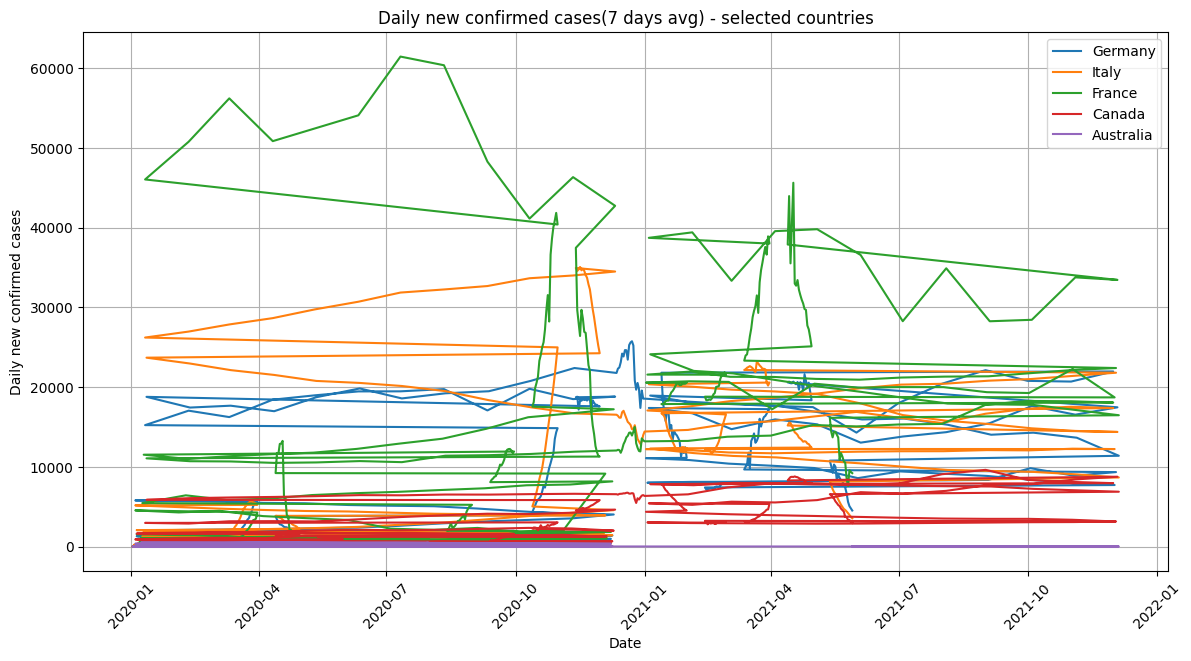

In [ ]:
plt.figure(figsize=(20,6))
for country in focus_countries:
           series = daily_by_country.loc[country]
           plt.plot(pd.to_datetime(series.index),series.values,label=country)
plt.title("Daily new confirmed cases - selected countries")
plt.xlabel("Date")
plt.ylabel("Daily new confirmed cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

plt.figure(figsize=(14,7))
for country in focus_countries:
           series = daily7_by_country.loc[country]
           plt.plot(pd.to_datetime(series.index),series.values,label=country)
plt.title("Daily new confirmed cases(7 days avg) - selected countries")
plt.xlabel("Date")
plt.ylabel("Daily new confirmed cases")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()

In [ ]:
#monthly totals per country
date_index = pd.to_datetime(confirmed_by_country.columns)




/tmp/ipython-input-2172148530.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  date_index = pd.to_datetime(confirmed_by_country.columns)


In [ ]:
month_lables = pd.PeriodIndex(date_index, freq="M").astype(str)
monthly_by_country = daily_by_country.groupby(month_lables, axis=1).sum()
print(monthly_by_country.iloc[:5,:5])

                2020-01  2020-02  2020-03  2020-04  2020-05
Country/Region                                             
Afghanistan      1454.0   1558.0   1796.0   3053.0  12306.0
Albania          1605.0   1558.0   1895.0   2043.0   2080.0
Algeria          3101.0   3012.0   3792.0   5209.0   6528.0
Andorra           137.0    310.0    490.0    341.0    442.0
Angola            586.0    470.0    679.0    563.0    616.0


/tmp/ipython-input-1077215790.py:2: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  monthly_by_country = daily_by_country.groupby(month_lables, axis=1).sum()


/tmp/ipython-input-1294283360.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


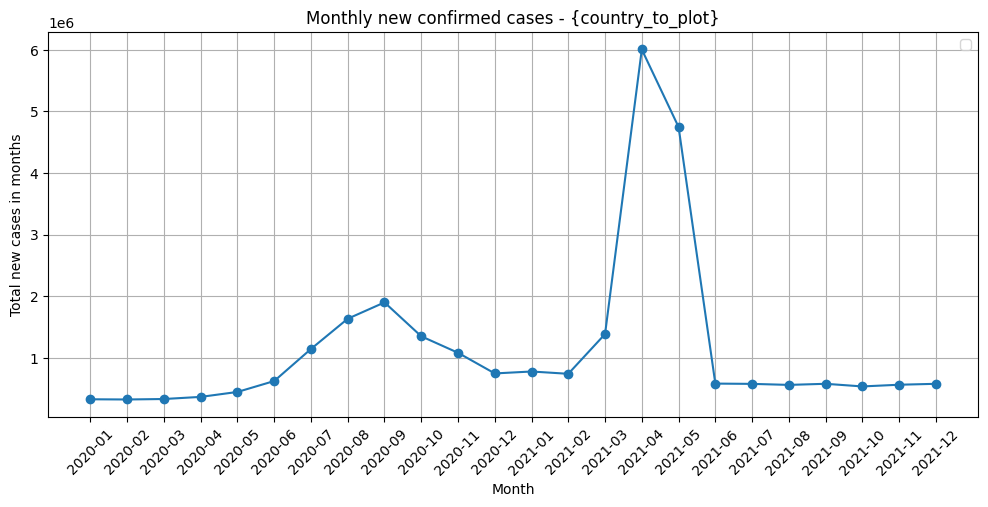

In [ ]:
country_to_plot = "India"
series_monthly = monthly_by_country.loc[country_to_plot]
plt.figure(figsize=(12,5))
plt.plot(series_monthly.index, series_monthly.values, marker="o")
plt.title("Monthly new confirmed cases - {country_to_plot}")
plt.xlabel("Month")
plt.ylabel("Total new cases in months")
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)

plt.show()
